In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
np.random.seed(42)

airlines = ['Air India', 'IndiGo', 'SpiceJet', 'Vistara', 'GoAir']
origins = ['DEL', 'BOM', 'BLR', 'HYD', 'MAA', 'GOI']
weather_conditions = ['Clear', 'Rain', 'Storm', 'Fog', 'Windy']

n_flights = 150
flight_data = pd.DataFrame({
    'flight_id': range(1, n_flights+1),
    'airline': np.random.choice(airlines, n_flights),
    'origin': np.random.choice(origins, n_flights),
    'destination': np.random.choice(origins, n_flights),
    'weather': np.random.choice(weather_conditions, n_flights, p=[0.5, 0.2, 0.1, 0.1, 0.1]),
    'aircraft_age': np.random.randint(1, 20, n_flights),
    'delay_minutes': np.random.normal(25, 30, n_flights).astype(int)
})

In [3]:
flight_data['delay_minutes'] = flight_data['delay_minutes'].apply(lambda x: max(x, 0))
flight_data['delayed'] = np.where(flight_data['delay_minutes'] > 30, 1, 0)

print("✈️ Flight Data Sample:")
display(flight_data.head())

✈️ Flight Data Sample:


,flight_id,airline,origin,destination,weather,aircraft_age,delay_minutes,delayed
0,1,Vistara,DEL,GOI,Storm,19,48,1
1,2,GoAir,GOI,GOI,Clear,18,16,0
2,3,SpiceJet,DEL,GOI,Rain,15,13,0
3,4,GoAir,DEL,GOI,Clear,9,0,0
4,5,GoAir,DEL,GOI,Clear,17,6,0


In [4]:
companies = ['ISRO', 'NASA', 'SpaceX', 'ESA', 'Roscosmos']
countries = ['India', 'USA', 'France', 'Russia', 'Japan']
years = np.arange(2000, 2025)

space_missions = pd.DataFrame({
    'mission': [f'Mission_{i}' for i in range(1, 51)],
    'company': np.random.choice(companies, 50),
    'year': np.random.choice(years, 50),
    'country': np.random.choice(countries, 50),
    'payload_mass': np.random.randint(1000, 20000, 50),
    'outcome': np.random.choice(['Success', 'Failure'], 50, p=[0.8, 0.2])
})

In [5]:
print("\n🚀 Space Mission Data Sample:")
display(space_missions.head())



🚀 Space Mission Data Sample:


,mission,company,year,country,payload_mass,outcome
0,Mission_1,ISRO,2016,Japan,13880,Success
1,Mission_2,SpaceX,2006,India,16517,Success
2,Mission_3,Roscosmos,2016,India,3106,Success
3,Mission_4,ISRO,2019,France,17086,Success
4,Mission_5,SpaceX,2008,France,5831,Success


C:\Users\HP\AppData\Local\Temp\ipykernel_19264\1555744068.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather', y='delay_minutes', data=flight_data, ci=None, palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_19264\1555744068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='delay_minutes', data=flight_data, ci=None, palette='coolwarm')


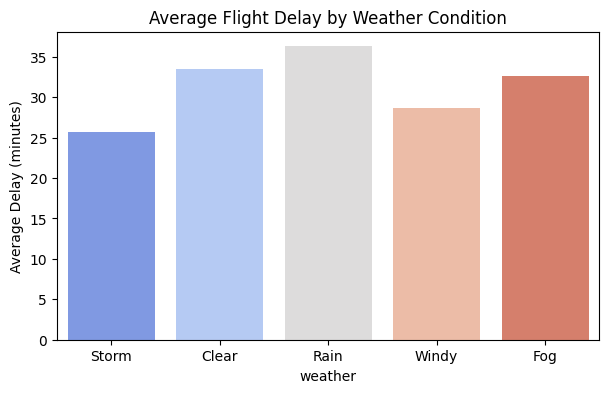

In [6]:
plt.figure(figsize=(7,4))
sns.barplot(x='weather', y='delay_minutes', data=flight_data, ci=None, palette='coolwarm')
plt.title("Average Flight Delay by Weather Condition")
plt.ylabel("Average Delay (minutes)")
plt.show()

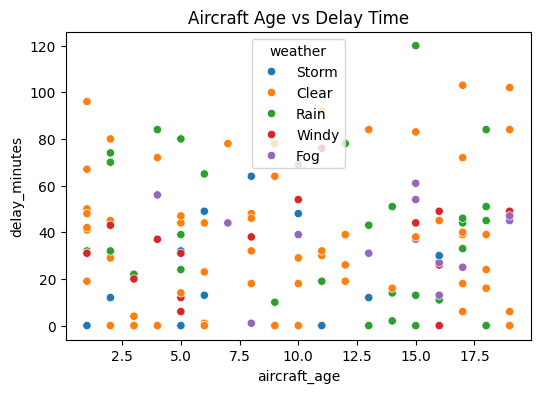

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='aircraft_age', y='delay_minutes', hue='weather', data=flight_data)
plt.title("Aircraft Age vs Delay Time")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19264\2759638660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data=space_missions, palette='pastel')


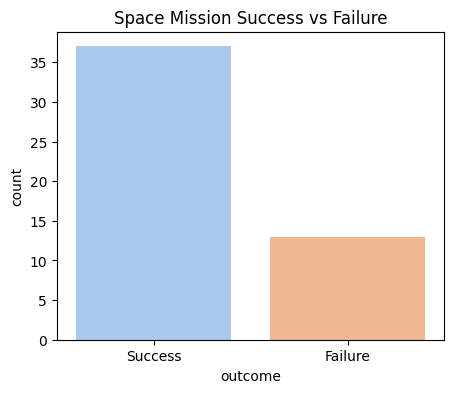

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='outcome', data=space_missions, palette='pastel')
plt.title("Space Mission Success vs Failure")
plt.show()


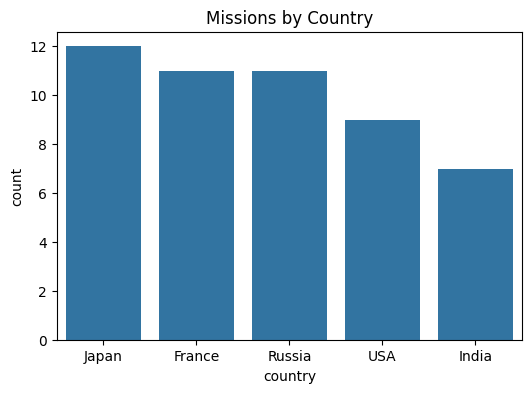

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='country', data=space_missions, order=space_missions['country'].value_counts().index)
plt.title("Missions by Country")
plt.show()

In [11]:
X = flight_data[['aircraft_age']]
y = flight_data['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📊 Flight Delay Prediction Report:")
print(classification_report(y_test, y_pred))



📊 Flight Delay Prediction Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        25
           1       0.42      0.70      0.53        20

    accuracy                           0.44        45
   macro avg       0.46      0.47      0.43        45
weighted avg       0.47      0.44      0.41        45

